In [1]:
from pathlib import Path 
import pandas as pd
import json
import seaborn as sns

import plotly.express as px
import plotly.io as pio

import numpy as np
import matplotlib.pyplot as plt

In [2]:
similarity_metrics = ['cka_kernel_linear_unbiased',
'cka_kernel_rbf_unbiased_sigma_0.2',
'cka_kernel_rbf_unbiased_sigma_0.4',
'cka_kernel_rbf_unbiased_sigma_0.6',
'cka_kernel_rbf_unbiased_sigma_0.8',
'rsa_method_correlation_corr_method_pearson',
'rsa_method_correlation_corr_method_spearman',]

num_clusters = 7
# similarity_metric = similarity_metrics[-2]
similarity_metric = similarity_metrics[2]

suffix = '_w_wd'

In [3]:
storing_path = Path(f'/home/space/diverse_priors/results/plots/single_models{suffix}/{similarity_metric}/num_clusters_{num_clusters}/cluster_qr')
SAVE = True
if SAVE:
    storing_path.mkdir(parents=True, exist_ok=True)

In [4]:
base_path_perf = Path(f'/home/lciernik/projects/divers-priors/diverse_priors/benchmark/scripts/test_results/max_performance_per_model{suffix}')

all_series = {}
for path in base_path_perf.glob('max_performance_per_model_*.json'):
    ds = path.stem.split('max_performance_per_model_')[1]
    with open(path, 'r') as f:
        res_dict = json.load(f)
    all_series[ds] = pd.Series(res_dict)

In [5]:
df = pd.DataFrame(all_series)
df.head()

,wds_imagenet1k,cifar100-coarse,wds_fer2013,wds_vtab_pcam,wds_vtab_dmlab,wds_gtsrb,wds_vtab_resisc45,wds_stl10,wds_vtab_svhn,wds_vtab_diabetic_retinopathy,...,wds_vtab_flowers,living17,wds_voc2007,nonliving26,wds_cars,wds_country211,wds_vtab_eurosat,wds_vtab_pets,wds_vtab_cifar10,entity13
DreamSim_dino_vitb16,0.72000,0.87900,0.594427,0.829346,0.506356,0.864466,0.929524,0.980625,0.720575,0.765011,...,0.863718,0.776471,0.888982,0.557308,0.574058,0.117716,0.972963,0.906787,0.96330,0.689846
DreamSim_open_clip_vitb32,0.69152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kakaobrain_Align,0.79042,0.79110,0.609362,0.836792,0.524214,0.836342,0.924127,0.972375,0.726068,0.764331,...,0.910880,0.795294,0.877604,0.635385,0.895411,0.257867,0.943333,0.869992,0.90580,0.768769
OpenCLIP_EVA01-g-14-plus_merged2b_s11b_b114k,0.86456,0.96992,0.720451,0.877545,0.558056,0.941425,0.963143,0.998825,0.845936,0.764312,...,0.987445,0.937882,0.918830,0.681154,0.943092,0.400332,0.973889,0.949469,0.99530,0.779846
OpenCLIP_EVA01-g-14_laion400m_s11b_b41k,0.85958,0.96270,0.701978,0.877130,0.552285,0.938147,0.963651,0.997350,0.802743,0.766759,...,0.991381,0.940000,0.911993,0.687385,0.948738,0.377991,0.970407,0.955029,0.99448,0.762954


In [6]:
path_clustering = Path(f'/home/space/diverse_priors/clustering/imagenet-subset-10k/{similarity_metric}/num_clusters_{num_clusters}/cluster_qr/cluster_labels.csv')
clustering = pd.read_csv(path_clustering)
clustering.set_index('model_id', inplace=True)
clustering.index.name = 'models'
clustering.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df['cluster'] = clustering.astype('category')

In [8]:
df = df.reset_index(names='models')

In [9]:
col_oders = [
    'models','cluster', 'wds_imagenet1k', 
    # 'wds_imagenet-a'     , 'wds_imagenet-r'  , 'wds_imagenet_sketch', 'wds_imagenetv2',
    'cifar100-coarse'    , 'entity13'        , 'entity30'           , 'living17', 
    'nonliving26'        , 'wds_cars'        , 'wds_country211'     , 'wds_fer2013',
    'wds_fgvc_aircraft'  , 'wds_gtsrb'       , 'wds_stl10'          , 'wds_voc2007', 
    'wds_vtab_caltech101', 'wds_vtab_cifar10', 'wds_vtab_cifar100'  , 'wds_vtab_diabetic_retinopathy', 
    'wds_vtab_dmlab'     , 'wds_vtab_dtd'    , 'wds_vtab_eurosat'   , 'wds_vtab_flowers', 
    'wds_vtab_pcam'      , 'wds_vtab_pets'   , 'wds_vtab_resisc45'  , 'wds_vtab_svhn'
]
df = df[col_oders].copy()
df = df[~df['cluster'].isna()].reset_index(drop=True).copy()

In [10]:
df.sort_values('wds_imagenet1k', ascending=True).head(5)

,models,cluster,wds_imagenet1k,cifar100-coarse,entity13,entity30,living17,nonliving26,wds_cars,wds_country211,...,wds_vtab_cifar100,wds_vtab_diabetic_retinopathy,wds_vtab_dmlab,wds_vtab_dtd,wds_vtab_eurosat,wds_vtab_flowers,wds_vtab_pcam,wds_vtab_pets,wds_vtab_resisc45,wds_vtab_svhn
47,vgg16,3,0.70290,0.70890,0.688154,0.610600,0.796118,0.563538,0.367193,0.087488,...,0.63570,0.742433,0.457321,0.604468,0.929963,0.758042,0.817505,0.900191,0.814159,0.674800
48,vgg19,3,0.71322,0.71604,0.678123,0.602500,0.813647,0.578615,0.352618,0.088938,...,0.63560,0.744772,0.456512,0.600319,0.925889,0.711107,0.811725,0.905642,0.799968,0.677635
0,DreamSim_dino_vitb16,3,0.72000,0.87900,0.689846,0.618667,0.776471,0.557308,0.574058,0.117716,...,0.84080,0.765011,0.506356,0.692553,0.972963,0.863718,0.829346,0.906787,0.929524,0.720575
16,barlowtwins-rn50,3,0.72328,0.80896,0.714246,0.633467,0.821882,0.546538,0.596493,0.129005,...,0.74744,0.766173,0.539309,0.723511,0.969667,0.889023,0.830353,0.883129,0.917587,0.759242
49,vicreg-rn50,3,0.72328,0.80896,0.714246,0.633467,0.821882,0.546538,0.596493,0.129005,...,0.74744,0.766173,0.539309,0.723511,0.969667,0.889023,0.830353,0.883129,0.917587,0.759242


In [11]:
r_values = {}
for col in col_oders[3:]:
    subset = df[['wds_imagenet1k', col]].copy()
    subset = subset[~subset[col].isna()]
    r = np.corrcoef(subset['wds_imagenet1k'], subset[col])[0,1]
    r_values[col] = r

In [12]:
df_melted = pd.melt(df,
            id_vars=['models', 'cluster', 'wds_imagenet1k'],
            var_name='Dataset',
            value_name='Top-1 Acc of dataset')

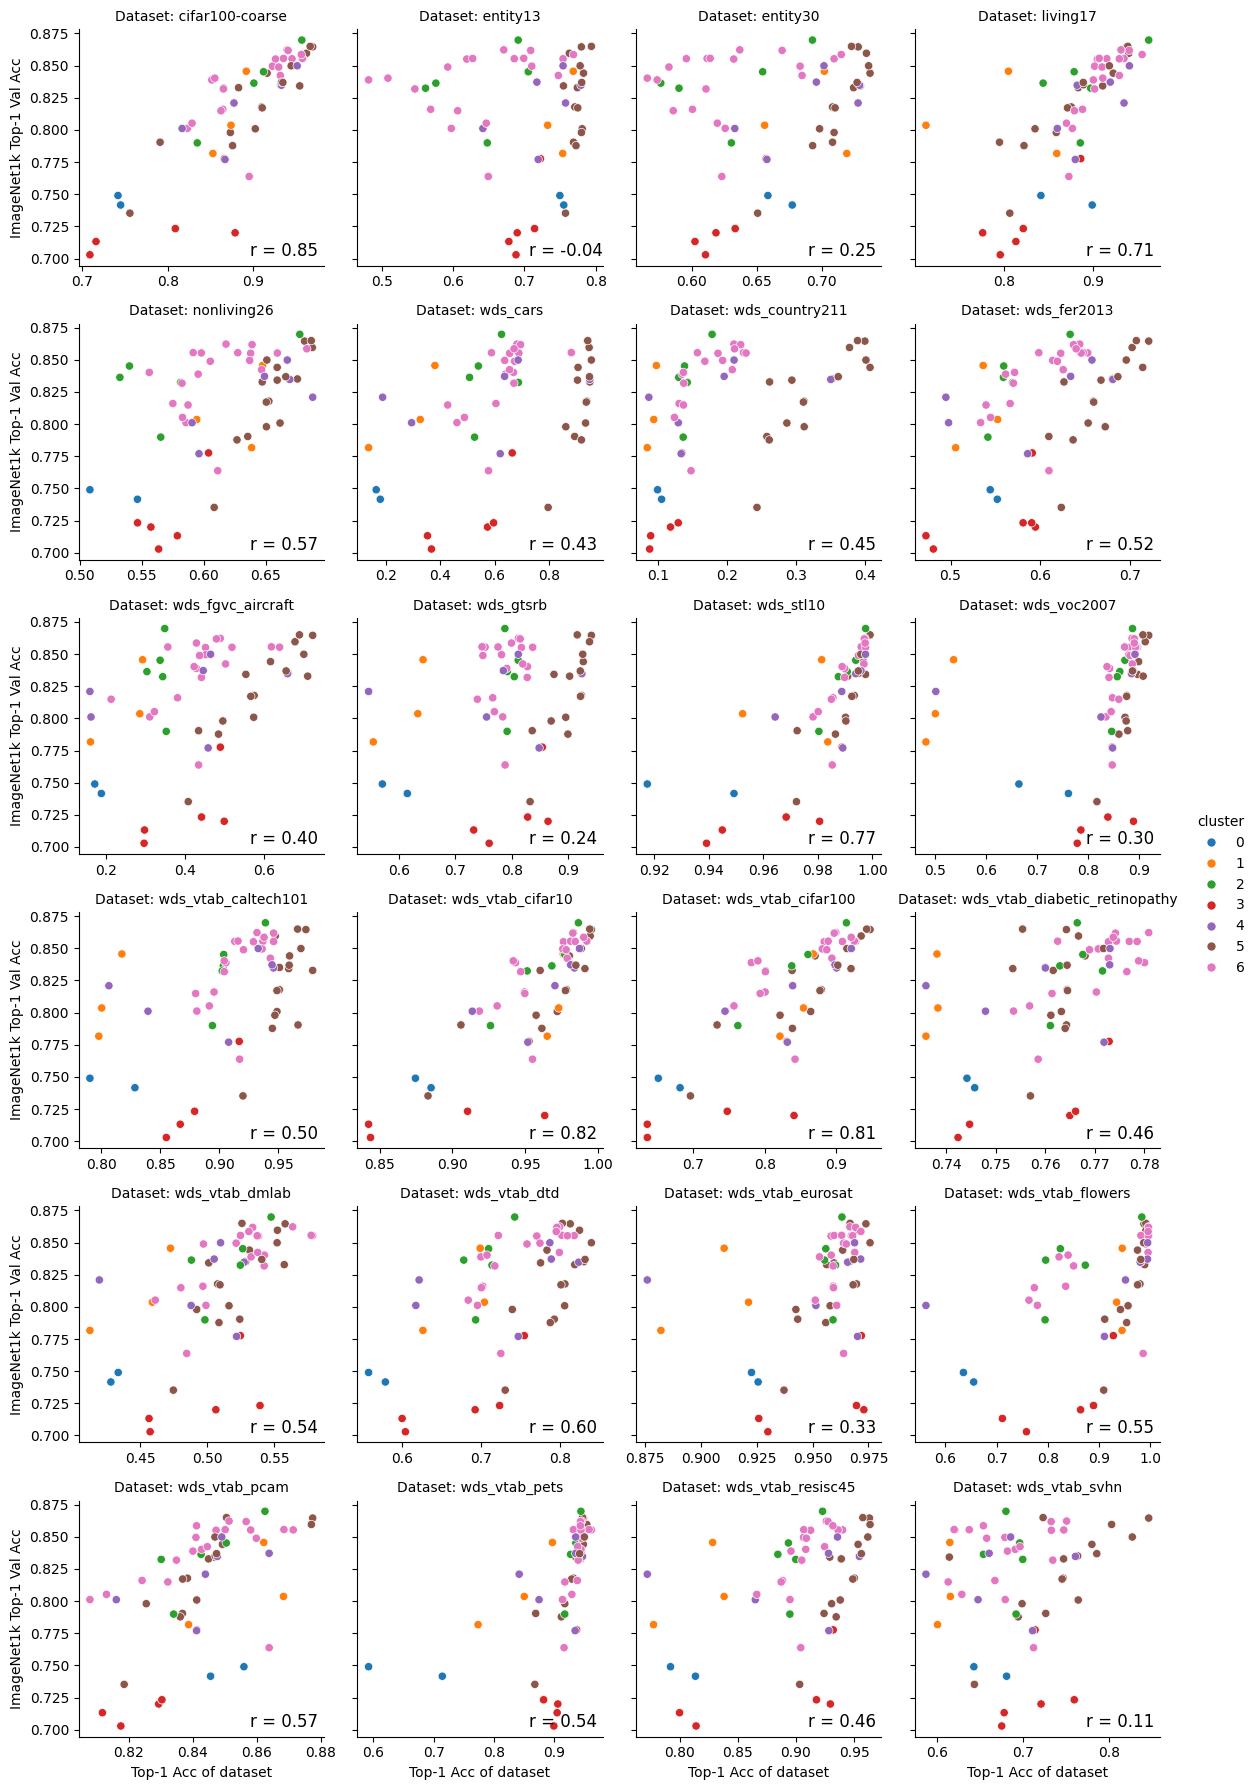

In [13]:
x_col = "Top-1 Acc of dataset"
y_col = "wds_imagenet1k"
split_col = "Dataset"
hue_col = 'cluster'
g = sns.relplot(data=df_melted, y=y_col, x=x_col, hue=hue_col, col=split_col, col_wrap=4, height=3, aspect=1, facet_kws={'sharex': False, 'sharey': True})

g.set_axis_labels(x_col, "ImageNet1k Top-1 Val Acc")
g.set_titles("Dataset: {col_name}", fontsize=16)

def annotate(data, **kws):
    r = r_values[data[split_col].unique()[0]]
    ax = plt.gca()
    # ax.text(.05, .95, f'r = {r:.2f}', transform=ax.transAxes, 
    ax.text(.7, .1, f'r = {r:.2f}', transform=ax.transAxes, 
            fontsize=12, verticalalignment='top')

g.map_dataframe(annotate);

if SAVE:
    plt.savefig(storing_path / f'scatter_in1k_vs_all_ds.pdf', bbox_inches='tight')
    plt.savefig(storing_path / f'scatter_in1k_vs_all_ds.png', bbox_inches='tight')

In [14]:
pio.renderers.default = 'iframe'

x_col = "Top-1 Acc of dataset"
y_col = "wds_imagenet1k"
split_col = "Dataset"
hue_col = 'cluster'

# Create the Plotly express scatter plot
fig = px.scatter(
    df_melted, 
    x=x_col, 
    y=y_col, 
    color=hue_col, 
    facet_col=split_col, 
    facet_col_wrap=4, 
    hover_data=['models'], 
    width=1200, 
    height=1750
)
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_yaxes(matches=None, showticklabels=True)

for i, annotation in enumerate(fig.layout.annotations):
    ds = annotation.text.split('=')[1]
    r = r_values[ds]
    subset = df_melted[df_melted[split_col] == ds]
    x_ax_min, x_ax_max = subset[x_col].min(), subset[x_col].max()
    y_ax_min, y_ax_max = subset[y_col].min(), subset[y_col].max()
    x = x_ax_min + 0.1*(x_ax_max - x_ax_min)
    y = y_ax_min + 0.9*(y_ax_max - y_ax_min)
    
    xref=f"x{i+1}"
    yref=f"y{i+1}"
    
    fig.add_annotation(
        x =x,
        y = y,
        xref=xref, 
            yref=yref,
            text=f'r = {r:.3f}',
            showarrow=False,
        xanchor='center',
        yanchor='bottom',
    )  

# Save the figure as an HTML file
if SAVE:
    fig_html = storing_path / "scatter_in1k_vs_all_ds.html"
    pio.write_html(fig, file=fig_html, auto_open=True)
fig.show()

In [15]:
raise ValueError()

ValueError: 

In [ ]:
g = sns.relplot(data=tmp, y="wds_imagenet1k", x='Top-1 Acc', col="OOD Dataset", height=3, aspect=1)
g.set_axis_labels("Top-1 Acc", "ImageNet1k Top-1 Val Acc")
g.set_titles("OOD Dataset: {col_name}", fontsize=16)

def annotate(data, **kws):
    x = data['Top-1 Acc']
    y = data['wds_imagenet1k']
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.text(.05, .95, f'r = {r:.2f}', transform=ax.transAxes, 
            fontsize=12, verticalalignment='top')

g.map_dataframe(annotate);

if SAVE:
    plt.savefig(storing_path / f'scatter_in1k_vs_ood.pdf', bbox_inches='tight')
    plt.savefig(storing_path / f'scatter_in1k_vs_ood.png', bbox_inches='tight')

In [ ]:

pio.renderers.default = 'iframe'

# Create the Plotly express scatter plot
fig = px.scatter(tmp, x="Top-1 Acc", y="wds_imagenet1k", facet_col="OOD Dataset",facet_col_wrap=4, hover_data=['models'])

for i, ood_dataset in enumerate(tmp['OOD Dataset'].unique()):
    subset = tmp[tmp['OOD Dataset'] == ood_dataset]
    corr = np.corrcoef(subset['Top-1 Acc'], subset['wds_imagenet1k'])[0, 1]
    
    # Determine the domain for the current facet
    col_num = i + 1
    xref = f"x{col_num}" if col_num > 1 else "x"
    yref = f"y{col_num}" if col_num > 1 else "y"

    fig.add_annotation(
        x=0.2, 
        y=0.9, 
        xref=f"{xref} domain", 
        yref=f"{yref} domain",
        xanchor='center',
        yanchor='bottom',
        text=f'r = {corr:.2f}',
        showarrow=False,
        font=dict(size=12)
    ) 

# Save the figure as an HTML file
fig_html = storing_path / "scatter_in1k_vs_ood.html"
pio.write_html(fig, file=fig_html, auto_open=True)

fig.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Assuming `tmp` is your DataFrame
# # Example DataFrame
# # tmp = pd.DataFrame({
# #     'Top-1 Acc': np.random.rand(100),
# #     'wds_imagenet1k': np.random.rand(100),
# #     'OOD Dataset': np.random.choice(['Dataset 1', 'Dataset 2'], 100),
# #     'models': ['model_' + str(i) for i in range(100)]
# # })

# # Create the relplot
# g = sns.relplot(data=tmp, y="wds_imagenet1k", x='Top-1 Acc', col="OOD Dataset", height=4, aspect=2, col_wrap=2, )
# g.set_axis_labels("Top-1 Acc", "ImageNet1k Top-1 Val Acc")
# g.set_titles("OOD Dataset: {col_name}")

# def annotate(data, **kws):
#     x = data['Top-1 Acc']
#     y = data['wds_imagenet1k']
#     r = np.corrcoef(x, y)[0, 1]
#     ax = plt.gca()
#     ax.text(.05, .95, f'r = {r:.2f}', transform=ax.transAxes, 
#             fontsize=12, verticalalignment='top')
    
#     # Annotate top 5 models
#     top5 = data.nlargest(5, 'Top-1 Acc')
#     for i, row in top5.iterrows():
#         ax.text(row['Top-1 Acc'], row['wds_imagenet1k'], row['models'], 
#                 color='blue', fontsize=8, weight='bold')
    
#     # Annotate lowest 5 models
#     low5 = data.nsmallest(5, 'Top-1 Acc')
#     for i, row in low5.iterrows():
#         ax.text(row['Top-1 Acc'], row['wds_imagenet1k'], row['models'], 
#                 color='red', fontsize=8, weight='bold')

# g.map_dataframe(annotate)

# # Show plot
# plt.show()
